## Load dataset

In [2]:
# chnage directory
path = "C:\\Users\\sin\\Desktop\\capstone_conocoPhillips"
import os
os.chdir(path)

In [82]:
#load the file
file_name =  "UT Comp_Seq.xlsx"
sheet =  1
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
comseq = pd.read_excel(io = file_name, sheet_name = 0)

## Clean Data
### 1. Remove Duplicate

In [4]:
df = comseq.copy()
# check for duplicate
dpl = sum(df.duplicated())
print("There is ",  dpl,  " duplicate") # no duplicate

There is  0  duplicate


### 2. Replace Na Values

#### Correlation 

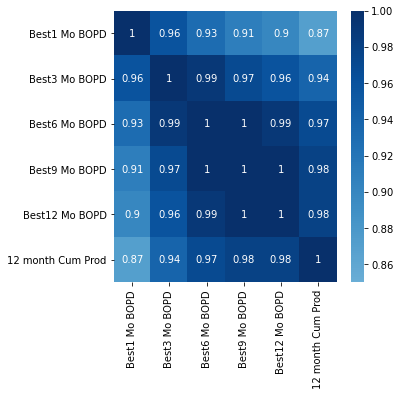

In [156]:
na_column = ['Best1 Mo BOPD', 'Best3 Mo BOPD', 'Best6 Mo BOPD',
       'Best9 Mo BOPD', 'Best12 Mo BOPD', '12 month Cum Prod']
corr_matrix = df[na_column].corr().round(2)
plt.figure(figsize=(5, 5))
sns.heatmap(corr_matrix, annot=True, vmax=1, vmin=0.85, center=.85, cmap='Blues')
plt.show()

#### Association between variablee

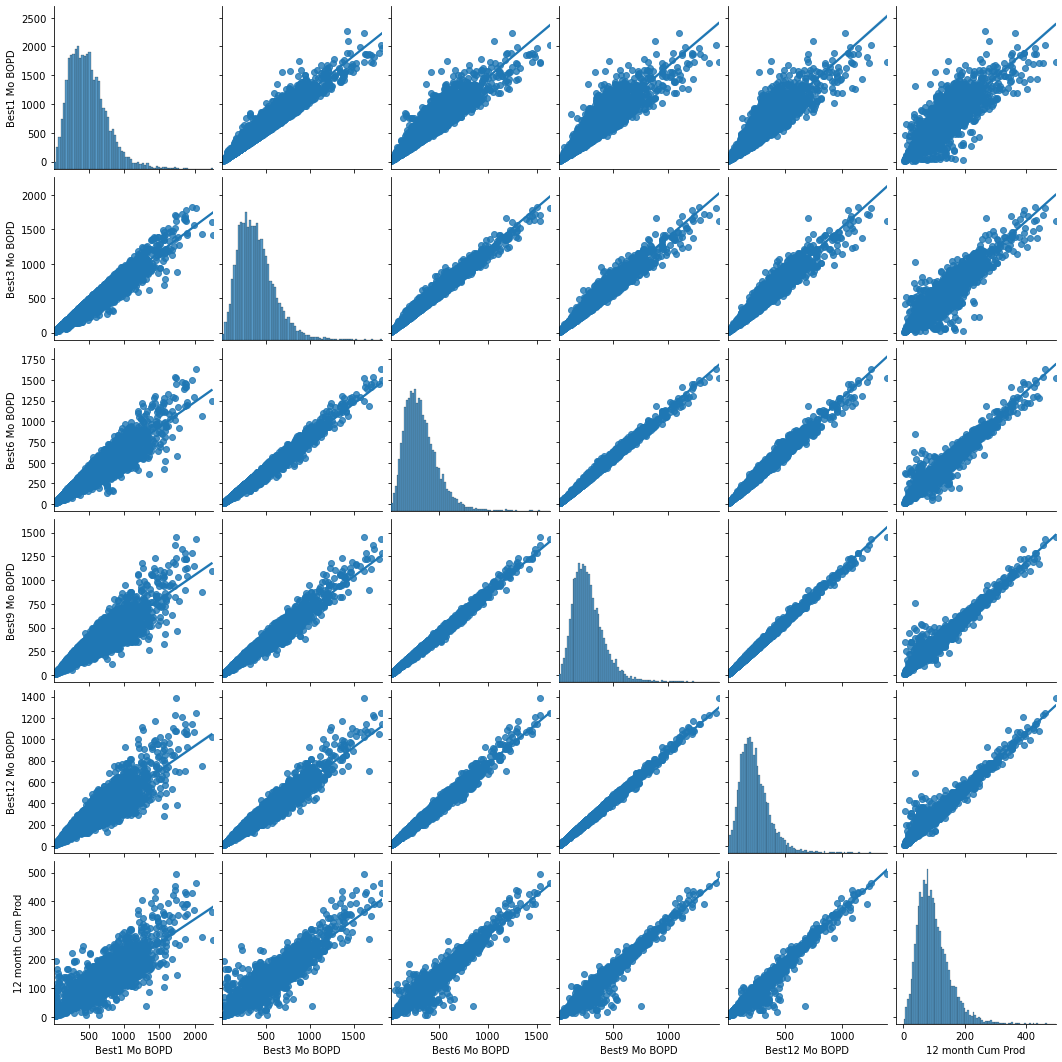

In [157]:
sns.pairplot(df[na_column], kind="reg")
plt.show()

#### Association between natural logarithmic variablee

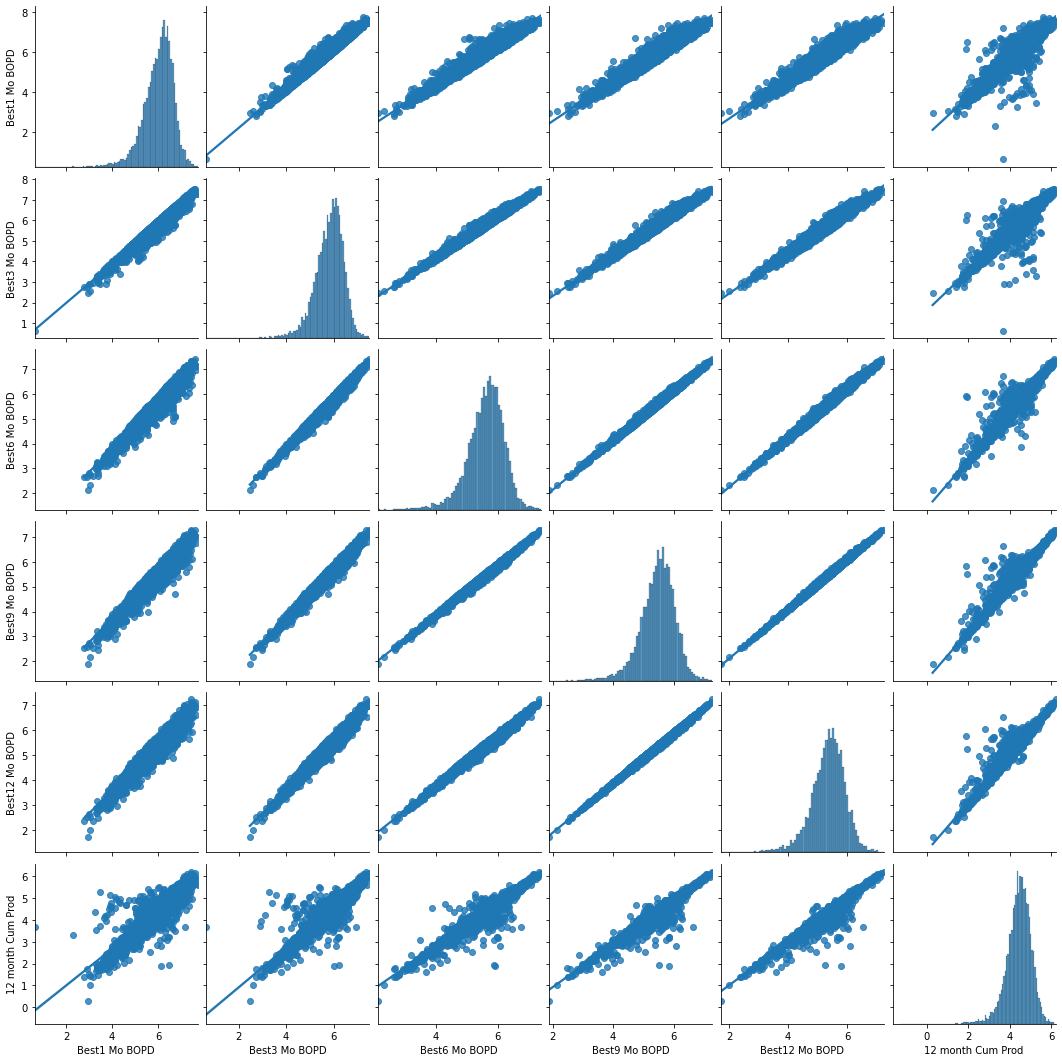

In [158]:
df_log = np.log(df[na_column])
sns.pairplot(df_log, kind="reg")
plt.show()

Because of non equal varience we use Natuarl Log 

#### Linear models for predicting Na valuse base on highest correlated varible

In [148]:
dflog_p01 = df_log[["Best1 Mo BOPD", "Best3 Mo BOPD"]].dropna()
model01 = LinearRegression().fit(dflog_p01["Best3 Mo BOPD"].values.reshape(-1,1),
                                dflog_p01["Best1 Mo BOPD"].values.reshape(-1,1))

In [149]:
dflog_p03 = df_log[["Best3 Mo BOPD", "Best6 Mo BOPD"]].dropna()
model03 = LinearRegression().fit(dflog_p03["Best6 Mo BOPD"].values.reshape(-1,1),
                                dflog_p03["Best3 Mo BOPD"].values.reshape(-1,1))

In [150]:
dflog_p06 = df_log[["Best6 Mo BOPD", "Best9 Mo BOPD"]].dropna()
model06 = LinearRegression().fit(dflog_p06["Best9 Mo BOPD"].values.reshape(-1,1),
                                dflog_p06["Best6 Mo BOPD"].values.reshape(-1,1))

In [153]:
dflog_p09 = df_log[["Best9 Mo BOPD", "Best12 Mo BOPD"]].dropna()
model09 = LinearRegression().fit(dflog_p09["Best12 Mo BOPD"].values.reshape(-1,1),
                                dflog_p09["Best9 Mo BOPD"].values.reshape(-1,1))

In [172]:
dflog_p12 = df_log[["Best12 Mo BOPD", "12 month Cum Prod"]].dropna()
model12 = LinearRegression().fit(dflog_p12["12 month Cum Prod"].values.reshape(-1,1),
                                dflog_p12["Best12 Mo BOPD"].values.reshape(-1,1))

# Apply each model to predecit the na valuse in each specific coloumn

In [193]:
df[na_column].isnull().sum()

Best1 Mo BOPD        1550
Best3 Mo BOPD        1656
Best6 Mo BOPD        2043
Best9 Mo BOPD        2464
Best12 Mo BOPD          0
12 month Cum Prod       0
dtype: int64

In [195]:
# Replace 'Best12 Mo BOPD' na values
df["pred_p12"] = np.exp(model12.predict(np.log(df["12 month Cum Prod"].values.reshape(-1,1))))
df["Best12 Mo BOPD"] = np.where(df["Best12 Mo BOPD"].isnull(),
                                df["pred_p12"],
                                df["Best12 Mo BOPD"])

In [196]:
# Replace "Best09 Mo BOPD" na values
df["pred_p9"] = np.exp(model09.predict(np.log(df["Best12 Mo BOPD"].values.reshape(-1,1))))
df["Best9 Mo BOPD"] = np.where(df["Best9 Mo BOPD"].isnull(),
                                df["pred_p9"],
                                df["Best9 Mo BOPD"])

In [197]:
# Replace "Best06 Mo BOPD" na values
df["pred_p6"] = np.exp(model06.predict(np.log(df["Best9 Mo BOPD"].values.reshape(-1,1))))
df["Best6 Mo BOPD"] = np.where(df["Best6 Mo BOPD"].isnull(),
                                df["pred_p6"],
                                df["Best6 Mo BOPD"])

In [198]:
# Replace "Best03 Mo BOPD" na values
df["pred_p3"] = np.exp(model03.predict(np.log(df["Best6 Mo BOPD"].values.reshape(-1,1))))
df["Best3 Mo BOPD"] = np.where(df["Best3 Mo BOPD"].isnull(),
                                df["pred_p3"],
                                df["Best3 Mo BOPD"])

In [199]:
# Replace "Best01 Mo BOPD" na values
df["pred_p1"] = np.exp(model01.predict(np.log(df["Best3 Mo BOPD"].values.reshape(-1,1))))
df["Best1 Mo BOPD"] = np.where(df["Best1 Mo BOPD"].isnull(),
                                df["pred_p1"],
                                df["Best1 Mo BOPD"])

In [200]:
df[na_column].isnull().sum()

Best1 Mo BOPD        0
Best3 Mo BOPD        0
Best6 Mo BOPD        0
Best9 Mo BOPD        0
Best12 Mo BOPD       0
12 month Cum Prod    0
dtype: int64

### Check Normality of "12 month Cum Prod"

#### Histogram Plot

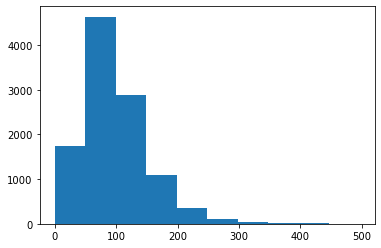

In [4]:
# histogram plot
from matplotlib import pyplot

# histogram plot
pyplot.hist(df["12 month Cum Prod"])
pyplot.show()

#### qq-plot

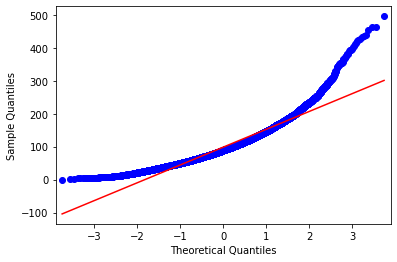

In [5]:
# QQ Plot
from statsmodels.graphics.gofplots import qqplot

qqplot(df["12 month Cum Prod"], line='s')
pyplot.show()

#### Shapiro-Wilk Test

In [6]:
# Shapiro-Wilk Test
import math
import numpy as np
from scipy.stats import shapiro
# normality test
stat, p = shapiro(df["12 month Cum Prod"])
print(p)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

0.0
Statistics=0.915, p=0.000
Sample does not look Gaussian (reject H0)


C:\Users\sin\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


#### D’Agostino’s K^2 Test

In [7]:
# D'Agostino and Pearson's Test
from scipy.stats import normaltest

stat, p = normaltest(df["12 month Cum Prod"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=3143.467, p=0.000
Sample does not look Gaussian (reject H0)


## Check normality for logistic transformation  

In [8]:
# Shapiro-Wilk Test
import math
import numpy as np
from scipy.stats import shapiro
# normality test
stat, p = shapiro(np.log(df["12 month Cum Prod"]))
print(p)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

5.605193857299268e-45
Statistics=0.965, p=0.000
Sample does not look Gaussian (reject H0)


In [9]:
# D'Agostino and Pearson's Test
from scipy.stats import normaltest

stat, p = normaltest(np.log(df["12 month Cum Prod"]))
print(p)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

0.0
Statistics=1739.089, p=0.000
Sample does not look Gaussian (reject H0)


## Completion type bar plot

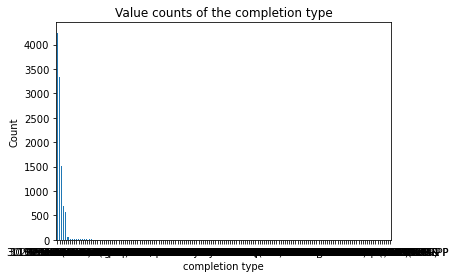

In [10]:
import matplotlib.pyplot as plt

df["Compl. Type"].value_counts().plot(kind="bar")
plt.title("Value counts of the completion type")
plt.xlabel("completion type")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

In [11]:
# add the count of cumplType to dataframe
df['ComplType_counts'] = df.groupby(['Compl. Type'])['12 month Cum Prod'].transform('count')

In [12]:
ComplType_unique = df["ComplType_counts"].unique()
print(sorted(ComplType_unique,
            reverse = True))

[4244.0, 3340.0, 1503.0, 687.0, 565.0, nan, 52.0, 26.0, 22.0, 20.0, 18.0, 16.0, 13.0, 10.0, 8.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0]


In [13]:
# replce the ComplType_counts < 50 with "other" 
df['ComplType_new'] = np.where(df['ComplType_counts'] < 500 , "others", df['Compl. Type'])
df['ComplType_new'].value_counts(dropna = False)

Sleeves         4244
P & P           3340
P & P (cmt.)    1503
OH               687
No Data          565
others           427
NaN               90
Name: ComplType_new, dtype: int64

In [14]:
# replace the nan value with "No Data"
df["ComplType_new"] = np.where(df["ComplType_new"].isnull(), "No Data" , df["ComplType_new"])
df['ComplType_new'].value_counts(dropna = False)

Sleeves         4244
P & P           3340
P & P (cmt.)    1503
OH               687
No Data          655
others           427
Name: ComplType_new, dtype: int64

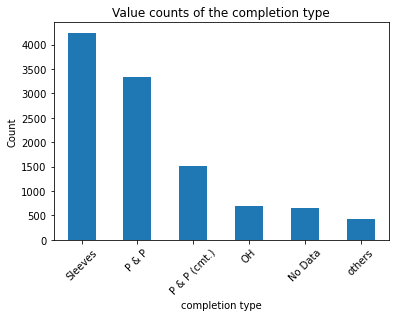

In [15]:
# bar plot again
df["ComplType_new"].value_counts().plot(kind="bar")
plt.title("Value counts of the completion type")
plt.xlabel("completion type")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.show()

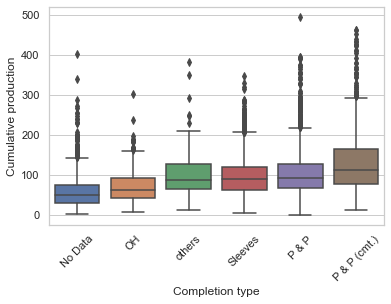

In [16]:
import seaborn as sns
sns.set(style="whitegrid")
 
# Find the order
my_order = df.groupby(by=["ComplType_new"])["12 month Cum Prod"].median().sort_values().index

# Give it to the boxplot
sns.boxplot(x = 'ComplType_new',
            y = '12 month Cum Prod',
            data = df,
            order = my_order)
plt.xticks(rotation = 45)
plt.xlabel("Completion type")
plt.ylabel("Cumulative production")
plt.show()

 ## Kruskal Wallis test

In [17]:
cum_prod_OH = df[( df["ComplType_new"] == "OH")]["12 month Cum Prod"]
cum_prod_NoData = df[( df["ComplType_new"] == "No Data")]["12 month Cum Prod"]
cum_prod_others = df[( df["ComplType_new"] == "others")]["12 month Cum Prod"]
cum_prod_Sleeves = df[( df["ComplType_new"] == "Sleeves")]["12 month Cum Prod"]
cum_prod_PP = df[( df["ComplType_new"] == "P & P")]["12 month Cum Prod"]
cum_prod_PPcmt = df[( df["ComplType_new"] == "P & P (cmt.)")]["12 month Cum Prod"]

from scipy import stats
stats.kruskal(cum_prod_OH,
              cum_prod_NoData,
              cum_prod_others,
             cum_prod_Sleeves,
             cum_prod_PP,
             cum_prod_PPcmt)

KruskalResult(statistic=1009.8730072680648, pvalue=4.378962429294685e-216)

Since the p-value is small there is significantly difference between completion type groups. 

# Formation

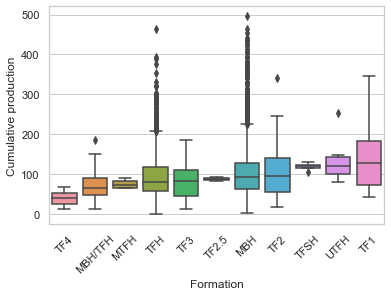

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
sns.set(style="whitegrid")
 
# Find the order
my_order = df.groupby(by=["Formation"])["12 month Cum Prod"].median().sort_values().index

# Give it to the boxplot
sns.boxplot(x = 'Formation',
            y = '12 month Cum Prod',
            data = df,
            order = my_order)
plt.xticks(rotation = 45)
plt.xlabel("Formation")
plt.ylabel("Cumulative production")
plt.show()

In [21]:
cum_prod_MBH = df[( df["Formation"] == "MBH")]["12 month Cum Prod"]
cum_prod_TFH = df[( df["Formation"] == "TFH")]["12 month Cum Prod"]
cum_prod_TF2 = df[( df["Formation"] == "TF2")]["12 month Cum Prod"]
cum_prod_TF3 = df[( df["Formation"] == "TF3")]["12 month Cum Prod"]
cum_prod_TF1 = df[( df["Formation"] == "TF1")]["12 month Cum Prod"]
cum_prod_MTFH = df[( df["Formation"] == "MTFH")]["12 month Cum Prod"]
cum_prod_UTFH = df[( df["Formation"] == "UTFH")]["12 month Cum Prod"]
cum_prod_TFSH = df[( df["Formation"] == "TFSH")]["12 month Cum Prod"]
cum_prod_TF4 = df[( df["Formation"] == "TF4")]["12 month Cum Prod"]
cum_prod_TF2_5 = df[( df["Formation"] == "TF2.5")]["12 month Cum Prod"]
cum_prod_MBHTFH = df[( df["Formation"] == "MBH/TFH")]["12 month Cum Prod"]

from scipy import stats
stats.kruskal(cum_prod_MBH,
              cum_prod_TFH,
              cum_prod_TF2,
              cum_prod_TF3,
              cum_prod_TF1,
              cum_prod_MTFH,
             cum_prod_UTFH,
             cum_prod_TFSH,
             cum_prod_TF4,
             cum_prod_TF2_5,
             cum_prod_MBHTFH)

KruskalResult(statistic=133.4052123040052, pvalue=9.423581974144481e-24)

## logistic regresion

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [19]:
x = df["12 month Cum Prod"]
y = df.ComplType_new
# splitting Data

x_train, x_test, y_train, y_test = train_test_split(x,
                 y,
                 test_size = .25,
                random_state = 483)
x_train = x_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)

In [20]:
# instantiate the model (using the default parameters)
model_logreg = LogisticRegression(random_state = 483)

# fit the model with data
model_logreg.fit(x_train, y_train)    
y_pred = model_logreg.predict(x_test)

C:\Users\sin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
def scatterGeoWells(color):
    import plotly.express as px
    fig = px.scatter_geo(df,
                       lat='Latitude',
                       lon='Longitude',
                       color=color)
    
    fig.update_layout(title = 'Well locations' + " (" + color + ")",
                    title_x=0.5,
                    geo = dict(scope = "usa"))
    
    fig.update_geos(fitbounds="locations",
                  visible=True)
    return fig

## 12 month cumulative production 

In [22]:
scatterGeoWells("12 month Cum Prod").show()

NameError: name 'scatterGeoWells' is not defined

## compare production in different time interval

In [23]:
def plotMapWells(c):
    fig = df.plot(kind="scatter",
              x="Longitude",
              y="Latitude",
              figsize=(10,7),
              label= c,
              c=c,
              cmap=plt.get_cmap("jet"),
              colorbar=True,
              alpha=0.4)

    plt.ylabel("Latitude", fontsize=14)
    plt.xlabel("Longitude", fontsize=14)
    plt.legend(fontsize=16)
    plt.show()

In [24]:
df.columns

Index(['Operator', 'Well Name', 'Formation', 'Lateral Length', 'Stages',
       'Township ', 'Range', 'Section', 'Total Prop, lbs', 'Fluid, bbls',
       'Date Fracd', 'Best1 Mo BOPD', 'Best3 Mo BOPD', 'Best6 Mo BOPD',
       'Best9 Mo BOPD', 'Best12 Mo BOPD', 'Compl. Type', 'Latitude',
       'Longitude', 'Fluid Type from DI', 'SPACING_CAPPED',
       '12 month Cum Prod', 'ComplType_counts', 'ComplType_new'],
      dtype='object')

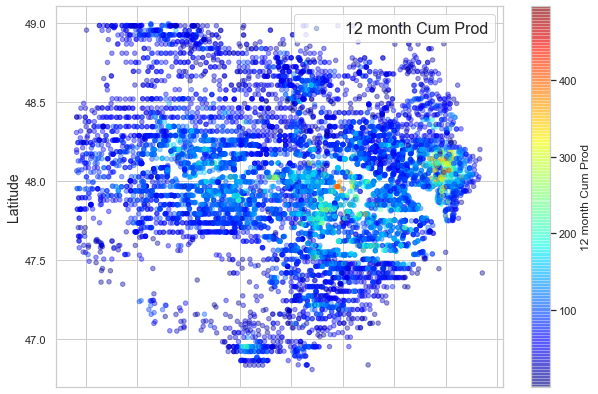

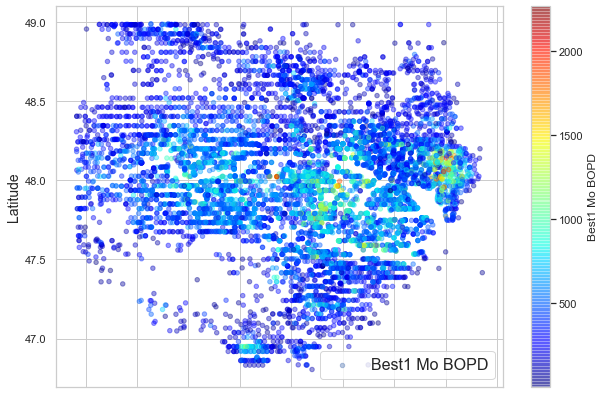

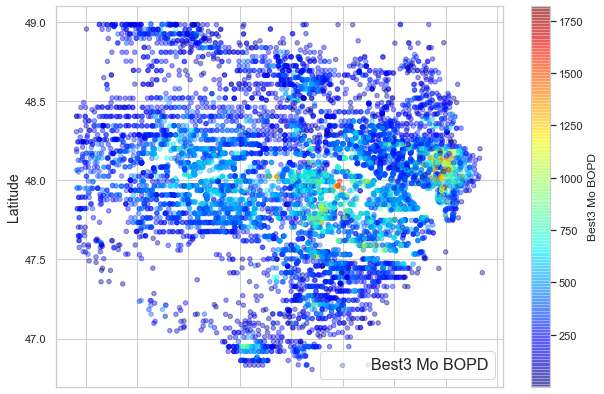

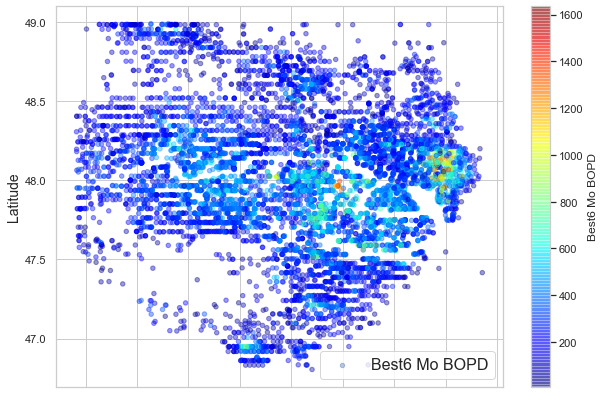

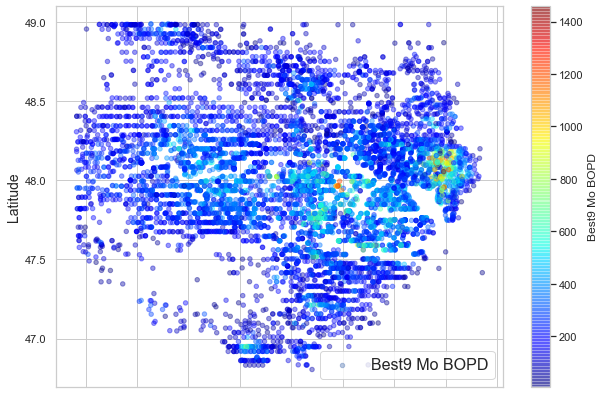

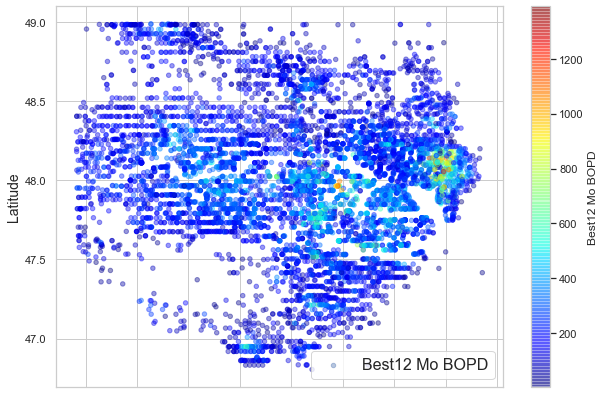

In [25]:
plotMapWells("12 month Cum Prod")
plotMapWells("Best1 Mo BOPD")
plotMapWells("Best3 Mo BOPD")
plotMapWells("Best6 Mo BOPD")
plotMapWells("Best9 Mo BOPD")
plotMapWells("Best12 Mo BOPD")

## Apply Decission Tree to predict the cumulative production base on location

In [26]:
df.columns

Index(['Operator', 'Well Name', 'Formation', 'Lateral Length', 'Stages',
       'Township ', 'Range', 'Section', 'Total Prop, lbs', 'Fluid, bbls',
       'Date Fracd', 'Best1 Mo BOPD', 'Best3 Mo BOPD', 'Best6 Mo BOPD',
       'Best9 Mo BOPD', 'Best12 Mo BOPD', 'Compl. Type', 'Latitude',
       'Longitude', 'Fluid Type from DI', 'SPACING_CAPPED',
       '12 month Cum Prod', 'ComplType_counts', 'ComplType_new'],
      dtype='object')

In [27]:
y = df["12 month Cum Prod"]
x = df[["Latitude", "Longitude"]]
# splitting Data

x_train, x_test, y_train, y_test = train_test_split(x,
                 y,
                 test_size = .25,
                random_state = 483)
#x_train = x_train.values.reshape(-1, 1)
#x_test = x_test.values.reshape(-1, 1)

In [28]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=483)
model.fit(x_train, y_train)
pred = model.predict(x_test)

## Performance of the model (Root Square Mean Error)

In [29]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, pred))
rmse

49.12587865259847

## Plot random location with predicted cumulative production

In [30]:
max_lat = df["Latitude"].max()
min_lat = df["Latitude"].min()
max_lon = df["Longitude"].max()
min_lon = df["Longitude"].min()

In [31]:
randon_location = {"Latitude": [],
                  "Longitude": []}
lat = np.linspace(min_lat, max_lat,  100)
lon = np.linspace(min_lon, max_lon,  100)

for i in lat:
    for j in lon:
        randon_location["Latitude"].append(i)
        randon_location["Longitude"].append(j)

In [32]:
randon_location = pd.DataFrame(randon_location)
pred_prod = model.predict(randon_location)

In [33]:
randon_location["12 month Cum Prod"] = pred_prod

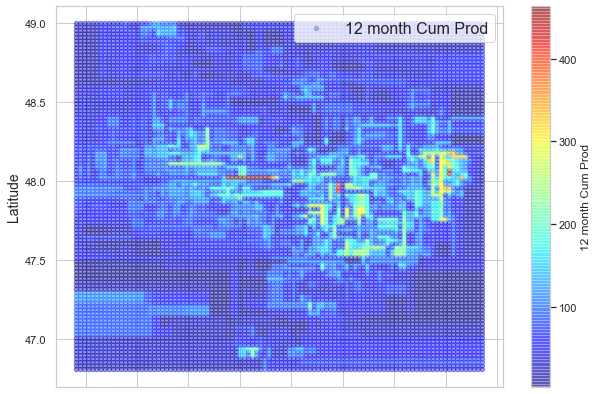

In [34]:
fig = randon_location.plot(kind="scatter",
              x="Longitude",
              y="Latitude",
              figsize=(10,7),
              label= "12 month Cum Prod",
              c="12 month Cum Prod",
              cmap=plt.get_cmap("jet"),
              colorbar=True,
              alpha=0.4)

plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.legend(fontsize=16)
plt.show()

## Compare with True plot cumulative production

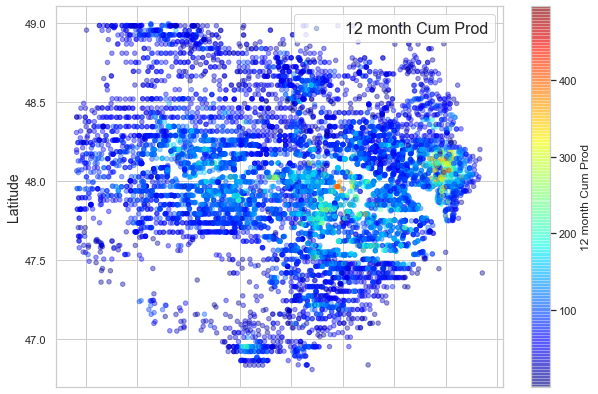

In [35]:
plotMapWells("12 month Cum Prod")